<table bgcolor=#ffffff align="center" width="100%" noborder>
    <tr>
        <td align="left" width="30%"><img src="images/IST_logo.png" width="50%"></td>
        <td width="40%"></td>
        <td align="right" width="30%"><img src="images/ds_logo.png" width="25%"></td>
    </tr>
    <tr><td align="left" width="30%"></td>
        <td width="40%"><p align="center"><img src="images/title.png"</td>
        <td align="right" width="30%"></td>
    </tr>
</table>

<h1 align="center" style="font-family:Arial;color:#6c6c6c;font-size:30px;">Lab 4: Evaluation</h1>

The evaluation of the results of each learnt model, in the classification paradigm, is objective and straightforward.
We just need to assess if the predicted labels are correct, which is done by measuring the number of records where 
the predicted label is equal to the known ones.

<h2 style="font-family:Arial;color:#6c6c6c;font-size:20px;font-style:italic;">Accuracy</h2>

The simplest measure is <strong>accuracy</strong>, which reports the percentage of correct predictions. It is just the
opposite of <strong>error</strong>. In <code>sklearn</code>, accuracy is reported through the <code>score</code> method
from each classifier, after its training and measured over a particular dataset and its known labels.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

data = pd.read_csv('data/diabetes.csv')
y = data.pop('class').values
X = data.values

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

clf = GaussianNB()
clf.fit(trnX, trnY)
clf.score(tstX, tstY)

0.7662337662337663

In our example, naive Bayes presents a not so good, only above 70%. But by itself, this number doesn't allow for
understanding which are the errors - where Naive Bayes is struggling.

<h2 style="font-family:Arial;color:#6c6c6c;font-size:20px;font-style:italic;">Confusion Matrix</h2>

Indeed, first we need to distinguish among the errors. In the presence of <strong>binary classification</strong>
problems (there are only two possible outcomes for the target variable), this distinction is easy. Usually, we call  
<i>negative</i> to the most common target value and <i>positive</i> to the other one. 

From this, we have:
- <strong>true positives (TP)</strong>: the number of positive records rightly predicted as positve;
- <strong>true negatives (TN)</strong>: the number of negatives records rightly predicted as negative;
- <strong>false positives (FP)</strong>: the number of negative records wrongly predicted as positve;
- <strong>false negatives (FN)</strong>: the number of positive records wrongly predicted as negative.

The <strong>confusion matrix</strong> is the standard to present these numbers, and is computed through the 
<code>confusion matrix</code> in the <code>sklearn.metrics</code> package. 

In [22]:
import numpy as np
import sklearn.metrics as metrics

labels: np.ndarray = pd.unique(y)
prdY: np.ndarray = clf.predict(tstX)
cnf_mtx: np.ndarray = metrics.confusion_matrix(tstY, prdY, labels)
cnf_mtx

array([[ 52,  29],
       [ 25, 125]])

Unfortunately, we are not able to see the correspondence between the matrix elements and the enumerated above, since 
there is no standard to specify the row and columns in the matrix. So the best way is to plot it in a specialized 
chart, as the one below.

<Figure size 432x288 with 0 Axes>

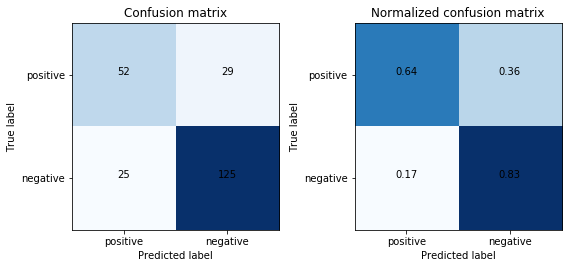

In [23]:
import itertools
import matplotlib.pyplot as plt
CMAP = plt.cm.Blues

def plot_confusion_matrix(ax: plt.Axes, cnf_matrix: np.ndarray, classes_names: list, normalize: bool = False):
    if normalize:
        total = cnf_matrix.sum(axis=1)[:, np.newaxis]
        cm = cnf_matrix.astype('float') / total
        title = "Normalized confusion matrix"
    else:
        cm = cnf_matrix
        title = 'Confusion matrix'
    np.set_printoptions(precision=2)
    tick_marks = np.arange(0, len(classes_names), 1)
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes_names)
    ax.set_yticklabels(classes_names)
    ax.imshow(cm, interpolation='nearest', cmap=CMAP)

    fmt = '.2f' if normalize else 'd'
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt), horizontalalignment="center")
 

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(8, 4), squeeze=False)
plot_confusion_matrix(axs[0,0], cnf_mtx, labels)
plot_confusion_matrix(axs[0,1], metrics.confusion_matrix(tstY, prdY, labels), labels, normalize=True)
plt.tight_layout()
plt.show()

Whenever in the presence of non-binary classification, we adapt those notions for each possible combination. For 
example, in the <i>iris</i> dataset we have 3 different classes: <i>iris-setosa</i>, <i>iris-versicolor</i> and 
<i>iris-virginica</i>.

<Figure size 432x288 with 0 Axes>

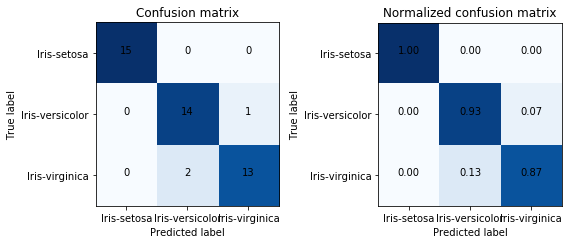

In [24]:
data = pd.read_csv('data/iris.csv')
y = data.pop('class').values
X = data.values
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

clf = GaussianNB()
clf.fit(trnX, trnY)
prdY = clf.predict(tstX)

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(8, 4), squeeze=False)
plot_confusion_matrix(axs[0,0], metrics.confusion_matrix(tstY, prdY, labels), labels)
plot_confusion_matrix(axs[0,1], metrics.confusion_matrix(tstY, prdY, labels), labels, normalize=True)
plt.tight_layout()
plt.show()


Besides the confusion matrix, there are several other measures that try to reflect the quality of the model, also 
available in the <code>sklearn.metrics</code> package. Next, we summarize the most used.

<table noborder>
    <tr><th><p text-align:"center">Classification metrics</th></tr>
    <tr><th><p text-align:"center"></th></tr>
    <tr><td><p text-align:"left"><code><b>recall_score(tstY: np.ndarray, prdY: np.ndarray) -> [0..1]</b></code></td></tr>
    <tr><td><p text-align:"left">also called <i>sensitivity></i> and <i>TP rate</i>, reveals the models ability to
        recognize the positive records, and is given by <code>TP/(TP+FN)</code>; receives the known labels in 
        <i>tstY</i> and the predicted ones in <i>prdY</i></td></tr>
    <tr><td><p text-align:"left"><code><b>precision_score(tstY: np.ndarray, prdY: np.ndarray) -> [0..1]</b></code></td></tr>
    <tr><td><p text-align:"left">reveals the models ability to not misclassify negative records, and is given by 
        <code>TP/(TP+FP)</code>; receives the known labels in <i>tstY</i> and the predicted ones in <i>prdY</i></td></tr>
    <tr><td><p text-align:"left"><code><b>f1_score(tstY: np.ndarray, prdY: np.ndarray) -> [0..1]</b></code></td></tr>
    <tr><td><p text-align:"left">computes the average between precision and recall, and is given by 
        <code>2 * (precision * recall) / (precision + recall)</code>; receives the known labels in <i>tstY</i> 
        and the predicted ones in <i>prdY</i></td></tr>
    <tr><td><p text-align:"left"><code><b>balanced_accuracy_score(tstY: np.ndarray, prdY: np.ndarray) -> [0..1]</b></code></td></tr>
    <tr><td><p text-align:"left">reveals the average of recall scores for all the classes; receives the known 
        labels in <i>tstY</i> and the predicted ones in <i>prdY</i></td></tr>
</table>

<h2 style="font-family:Arial;color:#6c6c6c;font-size:20px;font-style:italic;">ROC Charts</h2>

<strong>ROC charts</strong> are another mean to understand models' performance, in particular in the presence of binary 
non balanced datasets.
They present the balance between True Positive rate (recall) and False Positive rate in a graphical way, and are
available through the <code>roc_curve</code> method in the <code>sklearn.metrics</code>.

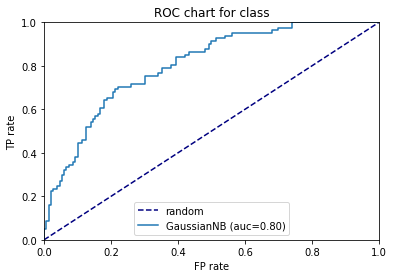

In [25]:
def plot_roc_chart(ax: plt.Axes, models: dict, tstX, tstY, target: str='class'):
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    ax.set_xlabel('FP rate')
    ax.set_ylabel('TP rate')
    ax.set_title('ROC chart for %s'%target)
    ax.plot([0, 1], [0, 1], color='navy', label='random', linestyle='--')
    
    for clf in models:
        scores = models[clf].predict_proba(tstX)[:,1]
        fpr, tpr, _ = metrics.roc_curve(tstY, scores, 'positive')
        roc_auc = metrics.roc_auc_score(tstY, scores)
        ax.plot(fpr, tpr, label='%s (auc=%0.2f)' %(clf, roc_auc))
    ax.legend(loc="lower center")


data = pd.read_csv('data/diabetes.csv')
y = data.pop('class').values
X = data.values
trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
model = GaussianNB().fit(trnX, trnY)

plt.figure()
plot_roc_chart(plt.gca(), {'GaussianNB': model}, tstX, tstY, 'class')
plt.show()

However, roc charts require two parameters: <code>tstY</code> and <code>scores</code>. While the first one is just the
labels for the test set, the second one reflects a kind of a probablity of each record in the test set being positive.
These scores are not trivial to get from some classification techniques, but can be computed through the <code>proba</code> 
method in their estimators. It works like the predict method, but instead of returning the predictions themselves, it
return those scores.

In addition to the chart, the <i>area under the roc curve</i>, <strong>auc</strong> for short, is another important 
measure, mostly for unbalanced datasets. It is available as <code>roc_auc_score</code>, in the <code>sklearn.metric</code>
package, and receives the known labels in its first parameter and the previous computed scores as the second one, just
like <code>roc_curve</code> method. 

<table bgcolor=#ffffff align="center" width="100%" noborder>
    <tr>
        <td align="center" width="30%"><a href="Lab30_classification.ipynb"><img src="images/prev.png"></a></td>
        <td width="40%"></td>
        <td align="center" width="30%"><a href="Lab3.ipynb"><img src="images/next_grey.png"></a></td>
    </tr>
</table>